[0.00000000e+00 8.54753814e+14 1.70950763e+15 2.56426144e+15
 3.41901526e+15 4.27376907e+15 5.12852288e+15 5.98327670e+15
 6.83803051e+15 7.69278433e+15]
[0.00000000e+00 4.64158883e-05 4.64158883e-05 4.64158883e-05
 4.64158883e-05 4.64158883e-05 4.64158883e-05 4.64158883e-05
 4.64158883e-05 4.64158883e-05]
[1.20000000e-01 4.64158883e-05 4.64158883e-05 4.64158883e-05
 4.64158883e-05 4.64158883e-05 4.64158883e-05 4.64158883e-05
 4.64158883e-05 4.64158883e-05]


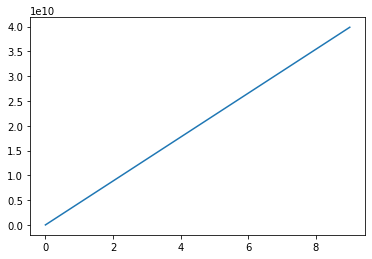

In [44]:
import numpy as np
from math import exp
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
#----------------Constants----------------
T=298 #K
n= 2
R=8.314
F=96485
C_an=np.array([.12, .12,0, .12]) #NH4, PO4, Mg, H+. Molar
z_k=np.array([1,-3,2,1])
C_ca=C_an
D_k=np.array([1.98e-9, 0.612e-9,0.705e-9, 9.310e-9])#m2/s from aquion.de
phi_eq_an=-2.357 #V SHE
phi_eq_ca=0

C_NH4=0.12
C_PO4=0.12

#Water Chemistry
K_eq=10**-13 #Solubility product
C=K_eq**(1/3) #concentration at saturation
k=1e-5 #rate constant of Mg2+

#----Initialize some stuff-------
t=np.arange(0.0,10.0,1)
Q=np.zeros_like(t)
N_Mg=np.zeros_like(t)
C_Mg=np.zeros_like(t)
C_NH4=np.zeros_like(t)
C_PO4=np.zeros_like(t)
N_struvite=np.zeros_like(t)

P_H2=.01 #idk
i_o=1e-5 #idk
V_an=0.015 #L

j_ext=10e-3 #A/cm2
A=1.67 #cm2
#i_ext=j*A
beta=0.5

#User Input
phi_an=0 #V
phi_ca=0 

#-----------Anode--------------------
#Calculate i_an and Coulombs for each time step


count=0
for time in t:
    eta_an=phi_an-phi_eq_an
    i_o= n*F*k*C_Mg**(1-beta)
    i = i_o*(exp((1-beta)*F*eta_an/(R*T))-exp(-beta*F*eta_an/(R*T)))
    Q[count]=i*time
    N_Mg[count]=Q[count]/(n*F) #Faraday's Law to calculate moles of Mg2+
    C_Mg[count]=N_Mg[count]/V_an
    
    C_NH4[count]=0.12
    C_PO4[count]=0.12
    Ksp=C_Mg[count]*C_NH4[count]*C_PO4[count]

    if Ksp>K_eq: #Condition for precipitation
        N_struvite[count]=(C_Mg[count]-C)*V_an #moles of struvite
        C_Mg[count]=C
        C_NH4[count]=C
        C_PO4[count]
    
    count +=1
print(Q)
print(C_Mg)
print(C_NH4)
plt.plot(t,N_struvite)